In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
import torchvision
import torch.optim as optim
import pytorch_lightning as pl
import copy
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import torchmetrics
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device=torch.device("cpu")
print(device)

cuda:0


In [3]:
classes=['Covid','No Covid']
num_classes=2
batch_size=4

In [4]:
# reshape all images to 64x64 and apply tensor transformation
dataset = torchvision.datasets.ImageFolder(root="./Full",transform=transforms.Compose([
                                                            transforms.ToTensor(),
                                                            transforms.Resize([227,227])
                                                            # transforms.Grayscale(num_output_channels=1)
                                                            ]))
# testset = torchvision.datasets.ImageFolder(root="./xray",train=False,transform=transforms.Compose([transforms.Resize([300,305]),transforms.ToTensor()]))
# testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [5]:
print(len(dataset))
trainset,testset=torch.utils.data.random_split(dataset,[round(0.8*len(dataset)),round(0.2*len(dataset))],generator=torch.Generator().manual_seed(42))
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False)
print(len(trainset)/batch_size,len(testset)/batch_size)

8088
1617.5 404.5


In [6]:
class CNN(nn.Module):
    def get_first_FC_Layer(self,x):
            x=self.representation_network(x).flatten(1)
            x=self.classification_network[0](x)
            return x;
    def get_Representation_Net(self,x):
            x=self.representation_network(x).flatten(1)
            return  x;
    def __init__(self):
        super(CNN,self).__init__()
        self.representation_network=nn.Sequential(
            nn.Conv2d(3,32,3), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2,stride=3),
            nn.Conv2d(32,32,3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=3),
            nn.Conv2d(32,64,3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=3),
        )
        self.classification_network=nn.Sequential(
            nn.Linear(3136,512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128,1)
        )
    def forward(self,x):
#         print(x.shape)
        x=self.representation_network(x)
#         print(x.shape)
        # flattening of the vector=> same dimension of first index(batch size) , everythign else is flattened(-1)
        x=x.view(x.size(0),-1)
#         print(x.shape)
        x=self.classification_network(x)
#         print(x.shape)
        return x

In [7]:
net = CNN()
net.load_state_dict(torch.load("./CNN6.pth").state_dict())

<All keys matched successfully>

In [8]:
def evaluation(dataloader,model):
    model.eval()
    with torch.no_grad():
        total,correct=0,0
        for data in dataloader:
            inputs,labels=data
            inputs,labels=inputs.to(device),labels.to(device)
            outputs=model(inputs)
    #         print(outputs)
    #         print(outputs,labels)
            m = nn.Sigmoid()
            outputs=m(outputs)
            pred=outputs>=0.5
            pred=pred.flatten()
            total+=labels.size(0)
            # labels=torch.add(labels,-1)
            # print(pred,labels)
    #         print(list(map(lambda a: classes[a],pred)),list(map(lambda a: classes[a],labels)))
            correct+=(pred==labels).sum().item()
    print(correct,total)
    model.train()
    return 100*correct/total

In [9]:
%%notify -m "Completed"

X_Train=np.empty((0,512))
Y_Train=np.empty((0,batch_size))
print(X_Train.shape)
for i,data in enumerate(trainloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    FCLayer=net.get_first_FC_Layer(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Train=np.append(X_Train,FCLayer,axis=0)
    Y_Train=np.append(Y_Train,labels.numpy())
print(X_Train.shape,Y_Train.shape)

(0, 512)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the bat

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


Done with the batch: 660
Done with the batch: 661
Done with the batch: 662
Done with the batch: 663
Done with the batch: 664
Done with the batch: 665
Done with the batch: 666
Done with the batch: 667
Done with the batch: 668
Done with the batch: 669
Done with the batch: 670
Done with the batch: 671
Done with the batch: 672
Done with the batch: 673
Done with the batch: 674
Done with the batch: 675
Done with the batch: 676
Done with the batch: 677
Done with the batch: 678
Done with the batch: 679
Done with the batch: 680
Done with the batch: 681
Done with the batch: 682
Done with the batch: 683
Done with the batch: 684
Done with the batch: 685
Done with the batch: 686
Done with the batch: 687
Done with the batch: 688
Done with the batch: 689
Done with the batch: 690
Done with the batch: 691
Done with the batch: 692
Done with the batch: 693
Done with the batch: 694
Done with the batch: 695
Done with the batch: 696
Done with the batch: 697
Done with the batch: 698
Done with the batch: 699


Done with the batch: 988
Done with the batch: 989
Done with the batch: 990
Done with the batch: 991
Done with the batch: 992
Done with the batch: 993
Done with the batch: 994
Done with the batch: 995
Done with the batch: 996
Done with the batch: 997
Done with the batch: 998
Done with the batch: 999
Done with the batch: 1000
Done with the batch: 1001
Done with the batch: 1002
Done with the batch: 1003
Done with the batch: 1004
Done with the batch: 1005
Done with the batch: 1006
Done with the batch: 1007
Done with the batch: 1008
Done with the batch: 1009
Done with the batch: 1010
Done with the batch: 1011
Done with the batch: 1012
Done with the batch: 1013
Done with the batch: 1014
Done with the batch: 1015
Done with the batch: 1016
Done with the batch: 1017
Done with the batch: 1018
Done with the batch: 1019
Done with the batch: 1020
Done with the batch: 1021
Done with the batch: 1022
Done with the batch: 1023
Done with the batch: 1024
Done with the batch: 1025
Done with the batch: 102

Done with the batch: 1304
Done with the batch: 1305
Done with the batch: 1306
Done with the batch: 1307
Done with the batch: 1308
Done with the batch: 1309
Done with the batch: 1310
Done with the batch: 1311
Done with the batch: 1312
Done with the batch: 1313
Done with the batch: 1314
Done with the batch: 1315
Done with the batch: 1316
Done with the batch: 1317
Done with the batch: 1318
Done with the batch: 1319
Done with the batch: 1320
Done with the batch: 1321
Done with the batch: 1322
Done with the batch: 1323
Done with the batch: 1324
Done with the batch: 1325
Done with the batch: 1326
Done with the batch: 1327
Done with the batch: 1328
Done with the batch: 1329
Done with the batch: 1330
Done with the batch: 1331
Done with the batch: 1332
Done with the batch: 1333
Done with the batch: 1334
Done with the batch: 1335
Done with the batch: 1336
Done with the batch: 1337
Done with the batch: 1338
Done with the batch: 1339
Done with the batch: 1340
Done with the batch: 1341
Done with th

<IPython.core.display.Javascript object>

In [10]:
%%notify -m "Completed"
X_Test=np.empty((0,512))
Y_Test=np.empty((0,batch_size))
print(X_Test.shape)
for i,data in enumerate(testloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    FCLayer=net.get_first_FC_Layer(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Test=np.append(X_Test,FCLayer,axis=0)
    Y_Test=np.append(Y_Test,labels.numpy())
print(X_Test.shape,Y_Test.shape)

(0, 512)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the bat

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


<IPython.core.display.Javascript object>

In [11]:
%%notify -m "Completed"
X_Train_FeatureMap=np.empty((0,3136))
Y_Train_FeatureMap=np.empty((0,batch_size))
print(X_Train_FeatureMap.shape)
for i,data in enumerate(trainloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    featureMap=net.get_Representation_Net(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Train_FeatureMap=np.append(X_Train_FeatureMap,featureMap,axis=0)
    Y_Train_FeatureMap=np.append(Y_Train_FeatureMap,labels.numpy())
print(X_Train_FeatureMap.shape,Y_Train_FeatureMap.shape)

(0, 3136)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the ba

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


Done with the batch: 660
Done with the batch: 661
Done with the batch: 662
Done with the batch: 663
Done with the batch: 664
Done with the batch: 665
Done with the batch: 666
Done with the batch: 667
Done with the batch: 668
Done with the batch: 669
Done with the batch: 670
Done with the batch: 671
Done with the batch: 672
Done with the batch: 673
Done with the batch: 674
Done with the batch: 675
Done with the batch: 676
Done with the batch: 677
Done with the batch: 678
Done with the batch: 679
Done with the batch: 680
Done with the batch: 681
Done with the batch: 682
Done with the batch: 683
Done with the batch: 684
Done with the batch: 685
Done with the batch: 686
Done with the batch: 687
Done with the batch: 688
Done with the batch: 689
Done with the batch: 690
Done with the batch: 691
Done with the batch: 692
Done with the batch: 693
Done with the batch: 694
Done with the batch: 695
Done with the batch: 696
Done with the batch: 697
Done with the batch: 698
Done with the batch: 699


Done with the batch: 988
Done with the batch: 989
Done with the batch: 990
Done with the batch: 991
Done with the batch: 992
Done with the batch: 993
Done with the batch: 994
Done with the batch: 995
Done with the batch: 996
Done with the batch: 997
Done with the batch: 998
Done with the batch: 999
Done with the batch: 1000
Done with the batch: 1001
Done with the batch: 1002
Done with the batch: 1003
Done with the batch: 1004
Done with the batch: 1005
Done with the batch: 1006
Done with the batch: 1007
Done with the batch: 1008
Done with the batch: 1009
Done with the batch: 1010
Done with the batch: 1011
Done with the batch: 1012
Done with the batch: 1013
Done with the batch: 1014
Done with the batch: 1015
Done with the batch: 1016
Done with the batch: 1017
Done with the batch: 1018
Done with the batch: 1019
Done with the batch: 1020
Done with the batch: 1021
Done with the batch: 1022
Done with the batch: 1023
Done with the batch: 1024
Done with the batch: 1025
Done with the batch: 102

Done with the batch: 1304
Done with the batch: 1305
Done with the batch: 1306
Done with the batch: 1307
Done with the batch: 1308
Done with the batch: 1309
Done with the batch: 1310
Done with the batch: 1311
Done with the batch: 1312
Done with the batch: 1313
Done with the batch: 1314
Done with the batch: 1315
Done with the batch: 1316
Done with the batch: 1317
Done with the batch: 1318
Done with the batch: 1319
Done with the batch: 1320
Done with the batch: 1321
Done with the batch: 1322
Done with the batch: 1323
Done with the batch: 1324
Done with the batch: 1325
Done with the batch: 1326
Done with the batch: 1327
Done with the batch: 1328
Done with the batch: 1329
Done with the batch: 1330
Done with the batch: 1331
Done with the batch: 1332
Done with the batch: 1333
Done with the batch: 1334
Done with the batch: 1335
Done with the batch: 1336
Done with the batch: 1337
Done with the batch: 1338
Done with the batch: 1339
Done with the batch: 1340
Done with the batch: 1341
Done with th

<IPython.core.display.Javascript object>

In [12]:
%%notify -m "Completed"
X_Test_FeatureMap=np.empty((0,3136))
Y_Test_FeatureMap=np.empty((0,batch_size))
print(X_Test_FeatureMap.shape)
for i,data in enumerate(testloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    featuremap=net.get_Representation_Net(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Test_FeatureMap=np.append(X_Test_FeatureMap,featuremap,axis=0)
    Y_Test_FeatureMap=np.append(Y_Test_FeatureMap,labels.numpy())
print(X_Test_FeatureMap.shape,Y_Test_FeatureMap.shape)

(0, 3136)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the ba

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


<IPython.core.display.Javascript object>

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [14]:
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-2,0.1,1,10],
                     'C': [0.001,0.1,1, 10, 100],
}
# tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3],
#                      'C': [0.001],
#                    }
clf = GridSearchCV(
        SVC(), tuned_parameters, scoring= 'accuracy',verbose=10
    )
clf.fit(X_Train, Y_Train.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 1/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.805 total time=  14.1s
[CV 2/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................


KeyboardInterrupt: 

In [19]:
def k_fold_cv_svm(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        clf=SVC(C=10,kernel='rbf',gamma=0.001)
        clf.fit(X_train,y_train.ravel())
        y_pred = clf.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del clf
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return clf

In [20]:
clf=k_fold_cv_svm(X_Train,Y_Train.ravel())
y_pred=clf.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test,y_pred))
print("Precision: ",precision_score(Y_Test,y_pred))
print("Recall: ",recall_score(Y_Test,y_pred))
print("F1-Score: ",f1_score(Y_Test,y_pred))
print("AUC: ",roc_auc_score(Y_Test,y_pred))

FOLD 0
--------------------------------
Accuracy: 95.5177743431221
FOLD 1
--------------------------------
Accuracy: 95.13137557959814
FOLD 2
--------------------------------
Accuracy: 95.20865533230294
FOLD 3
--------------------------------
Accuracy: 94.51313755795981
FOLD 4
--------------------------------
Accuracy: 95.6723338485317
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 95.5177743431221 %
Fold 1: 95.13137557959814 %
Fold 2: 95.20865533230294 %
Fold 3: 94.51313755795981 %
Fold 4: 95.6723338485317 %
Average: 95.20865533230294 %
Accuracy:  0.9283065512978986
Precision:  0.921875
Recall:  0.9376528117359413
F1-Score:  0.9296969696969697
AUC:  0.9282014058679706


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
def k_fold_cv_dtree(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        decision_tree = DecisionTreeClassifier(random_state=102)
        decision_tree = decision_tree.fit(X_train, y_train.ravel())
        y_pred = decision_tree.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del decision_tree
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return decision_tree

In [23]:
dtree=k_fold_cv_dtree(X_Train,Y_Train.ravel())
y_pred=dtree.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test,y_pred))
print("Precision: ",precision_score(Y_Test,y_pred))
print("Recall: ",recall_score(Y_Test,y_pred))
print("F1-Score: ",f1_score(Y_Test,y_pred))
print("AUC: ",roc_auc_score(Y_Test,y_pred))

FOLD 0
--------------------------------
Accuracy: 90.72642967542504
FOLD 1
--------------------------------
Accuracy: 91.57650695517773
FOLD 2
--------------------------------
Accuracy: 91.19010819165379
FOLD 3
--------------------------------
Accuracy: 90.49459041731066
FOLD 4
--------------------------------
Accuracy: 91.42194744976815
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 90.72642967542504 %
Fold 1: 91.57650695517773 %
Fold 2: 91.19010819165379 %
Fold 3: 90.49459041731066 %
Fold 4: 91.42194744976815 %
Average: 91.08191653786707 %
Accuracy:  0.892459826946848
Precision:  0.8936430317848411
Recall:  0.8936430317848411
F1-Score:  0.8936430317848411
AUC:  0.8924465158924205


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
def k_fold_cv_rforest(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
        random_forest = random_forest.fit(X_train, y_train.ravel())
        y_pred = random_forest.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del random_forest
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return random_forest

In [26]:
random_forest=k_fold_cv_rforest(X_Train,Y_Train.ravel())
y_pred=random_forest.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test,y_pred))
print("Precision: ",precision_score(Y_Test,y_pred))
print("Recall: ",recall_score(Y_Test,y_pred))
print("F1-Score: ",f1_score(Y_Test,y_pred))
print("AUC: ",roc_auc_score(Y_Test,y_pred))

FOLD 0
--------------------------------
Accuracy: 94.43585780525503
FOLD 1
--------------------------------
Accuracy: 95.5950540958269
FOLD 2
--------------------------------
Accuracy: 94.97681607418856
FOLD 3
--------------------------------
Accuracy: 93.97217928902627
FOLD 4
--------------------------------
Accuracy: 94.82225656877898
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 94.43585780525503 %
Fold 1: 95.5950540958269 %
Fold 2: 94.97681607418856 %
Fold 3: 93.97217928902627 %
Fold 4: 94.82225656877898 %
Average: 94.76043276661514 %
Accuracy:  0.9128553770086527
Precision:  0.9034564958283671
Recall:  0.9266503667481663
F1-Score:  0.9149064574532287
AUC:  0.9127001833740831


In [27]:
import xgboost as xgb


In [28]:
def k_fold_cv_xgb(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        eval_set = [(X_train, y_train.ravel()), (X_test, y_test)]
        xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
        xg_cl.fit(X_train,y_train.ravel())
        y_pred = xg_cl.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del xg_cl
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return xg_cl

In [29]:
xg=k_fold_cv_xgb(X_Train,Y_Train.ravel())
y_pred=xg.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test,y_pred))
print("Precision: ",precision_score(Y_Test,y_pred))
print("Recall: ",recall_score(Y_Test,y_pred))
print("F1-Score: ",f1_score(Y_Test,y_pred))
print("AUC: ",roc_auc_score(Y_Test,y_pred))

FOLD 0
--------------------------------
[19:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 94.43585780525503
FOLD 1
--------------------------------
[19:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 94.20401854714065
FOLD 2
--------------------------------
[19:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
def k_fold_cv_mlp(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        clf = MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del clf
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return clf

In [32]:
clf=k_fold_cv_mlp(X_Train,Y_Train.ravel())
y_pred=clf.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test,y_pred))
print("Precision: ",precision_score(Y_Test,y_pred))
print("Recall: ",recall_score(Y_Test,y_pred))
print("F1-Score: ",f1_score(Y_Test,y_pred))
print("AUC: ",roc_auc_score(Y_Test,y_pred))

FOLD 0
--------------------------------
Iteration 1, loss = 0.29601974
Iteration 2, loss = 0.20136104
Iteration 3, loss = 0.17591851
Iteration 4, loss = 0.16658832
Iteration 5, loss = 0.15833531
Iteration 6, loss = 0.15224243
Iteration 7, loss = 0.14670272
Iteration 8, loss = 0.14397531
Iteration 9, loss = 0.15224828
Iteration 10, loss = 0.15500380
Iteration 11, loss = 0.13527895
Iteration 12, loss = 0.13363870
Iteration 13, loss = 0.14722962
Iteration 14, loss = 0.13142271
Iteration 15, loss = 0.13059529
Iteration 16, loss = 0.13672617
Iteration 17, loss = 0.12969524
Iteration 18, loss = 0.12768176
Iteration 19, loss = 0.12261944
Iteration 20, loss = 0.11968651
Iteration 21, loss = 0.12114854
Iteration 22, loss = 0.12310863
Iteration 23, loss = 0.12403805
Iteration 24, loss = 0.12107663
Iteration 25, loss = 0.12199663
Iteration 26, loss = 0.11184237
Iteration 27, loss = 0.11220169
Iteration 28, loss = 0.11193331
Iteration 29, loss = 0.10898876
Iteration 30, loss = 0.10745840
Iteration

Iteration 68, loss = 0.08943896
Iteration 69, loss = 0.08475920
Iteration 70, loss = 0.08876705
Iteration 71, loss = 0.09085463
Iteration 72, loss = 0.07939229
Iteration 73, loss = 0.08096552
Iteration 74, loss = 0.07829114
Iteration 75, loss = 0.08065821
Iteration 76, loss = 0.07788832
Iteration 77, loss = 0.08087782
Iteration 78, loss = 0.08110012
Iteration 79, loss = 0.07780745
Iteration 80, loss = 0.08140508
Iteration 81, loss = 0.08664764
Iteration 82, loss = 0.08151386
Iteration 83, loss = 0.07708595
Iteration 84, loss = 0.07783908
Iteration 85, loss = 0.07827617
Iteration 86, loss = 0.07374880
Iteration 87, loss = 0.07714086
Iteration 88, loss = 0.08070334
Iteration 89, loss = 0.07359222
Iteration 90, loss = 0.07423508
Iteration 91, loss = 0.07824375
Iteration 92, loss = 0.07522846
Iteration 93, loss = 0.07392128
Iteration 94, loss = 0.08096487
Iteration 95, loss = 0.08029955
Iteration 96, loss = 0.07200145
Iteration 97, loss = 0.06817234
Iteration 98, loss = 0.06955148
Iteratio

Iteration 116, loss = 0.06707121
Iteration 117, loss = 0.07379792
Iteration 118, loss = 0.06270826
Iteration 119, loss = 0.06349675
Iteration 120, loss = 0.06971230
Iteration 121, loss = 0.06331480
Iteration 122, loss = 0.06647188
Iteration 123, loss = 0.06446644
Iteration 124, loss = 0.06050424
Iteration 125, loss = 0.06711812
Iteration 126, loss = 0.06496457
Iteration 127, loss = 0.06008789
Iteration 128, loss = 0.06109690
Iteration 129, loss = 0.05935318
Iteration 130, loss = 0.05913989
Iteration 131, loss = 0.05892381
Iteration 132, loss = 0.05958508
Iteration 133, loss = 0.06431709
Iteration 134, loss = 0.05696596
Iteration 135, loss = 0.05679530
Iteration 136, loss = 0.05819294
Iteration 137, loss = 0.06470650
Iteration 138, loss = 0.05982813
Iteration 139, loss = 0.05643595
Iteration 140, loss = 0.05728558
Iteration 141, loss = 0.05935956
Iteration 142, loss = 0.05290159
Iteration 143, loss = 0.05710593
Iteration 144, loss = 0.06922155
Iteration 145, loss = 0.06233369
Iteration 

Iteration 34, loss = 0.10422649
Iteration 35, loss = 0.10364475
Iteration 36, loss = 0.10474774
Iteration 37, loss = 0.10771299
Iteration 38, loss = 0.09805060
Iteration 39, loss = 0.09865118
Iteration 40, loss = 0.10027133
Iteration 41, loss = 0.10142365
Iteration 42, loss = 0.11538759
Iteration 43, loss = 0.10822831
Iteration 44, loss = 0.09369318
Iteration 45, loss = 0.09939876
Iteration 46, loss = 0.09333098
Iteration 47, loss = 0.09199236
Iteration 48, loss = 0.09082174
Iteration 49, loss = 0.09075206
Iteration 50, loss = 0.09572603
Iteration 51, loss = 0.09250350
Iteration 52, loss = 0.09029694
Iteration 53, loss = 0.08885084
Iteration 54, loss = 0.09365565
Iteration 55, loss = 0.09494673
Iteration 56, loss = 0.09112209
Iteration 57, loss = 0.08616002
Iteration 58, loss = 0.08613155
Iteration 59, loss = 0.08585060
Iteration 60, loss = 0.08676776
Iteration 61, loss = 0.09441012
Iteration 62, loss = 0.08415281
Iteration 63, loss = 0.08337288
Iteration 64, loss = 0.09263703
Iteratio

In [33]:
from sklearn.decomposition import KernelPCA

Text(0, 0.5, 'cumulative explained variance')

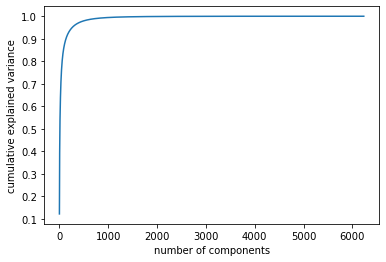

In [30]:
kpca = KernelPCA(kernel = 'rbf')
kpca_transform = kpca.fit_transform(X_Train_FeatureMap)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [34]:
kpca = KernelPCA(kernel = 'rbf',n_components=3000)
X_Train_Transformed_FeatureMap = kpca.fit_transform(X_Train_FeatureMap)
print(X_Train_Transformed_FeatureMap.shape)

(6470, 3000)


In [35]:
X_Test_Transformed_FeatureMap = kpca.transform(X_Test_FeatureMap)

print(X_Test_FeatureMap.shape,X_Test_Transformed_FeatureMap.shape)

(1618, 3136) (1618, 3000)


In [33]:
# %% notify -m "GridCV"
tuned_parameters = {'kernel': ['rbf'], 'gamma': [10,100],
                     'C': [10],
}
clf = GridSearchCV(
        SVC(), tuned_parameters, scoring= 'accuracy',verbose=10
    )
clf.fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 1/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.944 total time=  18.7s
[CV 2/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 2/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.930 total time=  18.0s
[CV 3/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 3/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.940 total time=  18.0s
[CV 4/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 4/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.937 total time=  18.1s
[CV 5/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 5/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.940 total time=  18.0s
[CV 1/5; 2/2] START C=10, gamma=100, kernel=rbf.................................
[CV 1/5; 2/2] END ..C=10, gamma=100, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'gamma': [10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [36]:
clf=k_fold_cv_svm(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=clf.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 49.1499227202473
FOLD 1
--------------------------------
Accuracy: 48.222565687789796
FOLD 2
--------------------------------
Accuracy: 48.99536321483771
FOLD 3
--------------------------------
Accuracy: 49.22720247295209
FOLD 4
--------------------------------
Accuracy: 49.53632148377125
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 49.1499227202473 %
Fold 1: 48.222565687789796 %
Fold 2: 48.99536321483771 %
Fold 3: 49.22720247295209 %
Fold 4: 49.53632148377125 %
Average: 49.02627511591963 %
Accuracy:  0.49443757725587145


C:\Users\visha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.0
Recall:  0.0
F1-Score:  0.0
AUC:  0.5


In [37]:
dtree=k_fold_cv_dtree(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=dtree.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 81.76197836166924
FOLD 1
--------------------------------
Accuracy: 81.99381761978361
FOLD 2
--------------------------------
Accuracy: 83.30757341576506
FOLD 3
--------------------------------
Accuracy: 79.98454404945903
FOLD 4
--------------------------------
Accuracy: 79.75270479134467
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 81.76197836166924 %
Fold 1: 81.99381761978361 %
Fold 2: 83.30757341576506 %
Fold 3: 79.98454404945903 %
Fold 4: 79.75270479134467 %
Average: 81.36012364760433 %
Accuracy:  0.7855377008652658
Precision:  0.7882496940024479
Recall:  0.7872860635696821
F1-Score:  0.7877675840978593
AUC:  0.785518031784841


In [41]:
xg=k_fold_cv_xgb(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=xg.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
[20:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 89.56723338485317
FOLD 1
--------------------------------
[20:51:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.57187017001546
FOLD 2
--------------------------------
[20:53:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

In [38]:
clf=k_fold_cv_mlp(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=clf.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Iteration 1, loss = 0.69003805
Iteration 2, loss = 0.67958354
Iteration 3, loss = 0.66436373
Iteration 4, loss = 0.64329261
Iteration 5, loss = 0.61585108
Iteration 6, loss = 0.58283988
Iteration 7, loss = 0.54677571
Iteration 8, loss = 0.50892058
Iteration 9, loss = 0.47191022
Iteration 10, loss = 0.43669568
Iteration 11, loss = 0.40469120
Iteration 12, loss = 0.37584757
Iteration 13, loss = 0.34939670
Iteration 14, loss = 0.32635130
Iteration 15, loss = 0.30633221
Iteration 16, loss = 0.28877317
Iteration 17, loss = 0.27392091
Iteration 18, loss = 0.26026939
Iteration 19, loss = 0.24841616
Iteration 20, loss = 0.23802523
Iteration 21, loss = 0.22896573
Iteration 22, loss = 0.22081322
Iteration 23, loss = 0.21295069
Iteration 24, loss = 0.20669409
Iteration 25, loss = 0.20019163
Iteration 26, loss = 0.19462581
Iteration 27, loss = 0.18958894
Iteration 28, loss = 0.18489886
Iteration 29, loss = 0.18013234
Iteration 30, loss = 0.17612004
Iteration

Iteration 252, loss = 0.04761136
Iteration 253, loss = 0.04768001
Iteration 254, loss = 0.04664948
Iteration 255, loss = 0.04656224
Iteration 256, loss = 0.04605425
Iteration 257, loss = 0.04671705
Iteration 258, loss = 0.04606849
Iteration 259, loss = 0.04588973
Iteration 260, loss = 0.04588769
Iteration 261, loss = 0.04554307
Iteration 262, loss = 0.04567879
Iteration 263, loss = 0.04538215
Iteration 264, loss = 0.04619766
Iteration 265, loss = 0.04531383
Iteration 266, loss = 0.04537359
Iteration 267, loss = 0.04535314
Iteration 268, loss = 0.04527481
Iteration 269, loss = 0.04516406
Iteration 270, loss = 0.04494439
Iteration 271, loss = 0.04466198
Iteration 272, loss = 0.04450148
Iteration 273, loss = 0.04452660
Iteration 274, loss = 0.04442022
Iteration 275, loss = 0.04421781
Iteration 276, loss = 0.04409319
Iteration 277, loss = 0.04401016
Iteration 278, loss = 0.04396411
Iteration 279, loss = 0.04370507
Iteration 280, loss = 0.04349130
Iteration 281, loss = 0.04348753
Iteration 

Iteration 4, loss = 0.64419808
Iteration 5, loss = 0.61710777
Iteration 6, loss = 0.58436404
Iteration 7, loss = 0.54832427
Iteration 8, loss = 0.51134673
Iteration 9, loss = 0.47458388
Iteration 10, loss = 0.43934336
Iteration 11, loss = 0.40660200
Iteration 12, loss = 0.37697557
Iteration 13, loss = 0.35086453
Iteration 14, loss = 0.32783120
Iteration 15, loss = 0.30773122
Iteration 16, loss = 0.29028374
Iteration 17, loss = 0.27494242
Iteration 18, loss = 0.26196229
Iteration 19, loss = 0.25024392
Iteration 20, loss = 0.23906378
Iteration 21, loss = 0.22986891
Iteration 22, loss = 0.22135449
Iteration 23, loss = 0.21370793
Iteration 24, loss = 0.20702229
Iteration 25, loss = 0.20076098
Iteration 26, loss = 0.19484183
Iteration 27, loss = 0.18952479
Iteration 28, loss = 0.18464665
Iteration 29, loss = 0.18040595
Iteration 30, loss = 0.17575751
Iteration 31, loss = 0.17247170
Iteration 32, loss = 0.16846962
Iteration 33, loss = 0.16503694
Iteration 34, loss = 0.16175746
Iteration 35, 

Iteration 256, loss = 0.04556527
Iteration 257, loss = 0.04523612
Iteration 258, loss = 0.04540787
Iteration 259, loss = 0.04560345
Iteration 260, loss = 0.04524303
Iteration 261, loss = 0.04491404
Iteration 262, loss = 0.04482670
Iteration 263, loss = 0.04478674
Iteration 264, loss = 0.04511019
Iteration 265, loss = 0.04512405
Iteration 266, loss = 0.04534345
Iteration 267, loss = 0.04443269
Iteration 268, loss = 0.04463608
Iteration 269, loss = 0.04428257
Iteration 270, loss = 0.04378629
Iteration 271, loss = 0.04415520
Iteration 272, loss = 0.04393999
Iteration 273, loss = 0.04373090
Iteration 274, loss = 0.04365087
Iteration 275, loss = 0.04357150
Iteration 276, loss = 0.04397242
Iteration 277, loss = 0.04365153
Iteration 278, loss = 0.04321872
Iteration 279, loss = 0.04335284
Iteration 280, loss = 0.04329107
Iteration 281, loss = 0.04294182
Iteration 282, loss = 0.04290994
Iteration 283, loss = 0.04296267
Iteration 284, loss = 0.04288332
Iteration 285, loss = 0.04266946
Iteration 

Iteration 87, loss = 0.09297896
Iteration 88, loss = 0.09230871
Iteration 89, loss = 0.09217677
Iteration 90, loss = 0.09123493
Iteration 91, loss = 0.09050868
Iteration 92, loss = 0.08994455
Iteration 93, loss = 0.08919011
Iteration 94, loss = 0.08894020
Iteration 95, loss = 0.08849108
Iteration 96, loss = 0.08798831
Iteration 97, loss = 0.08721624
Iteration 98, loss = 0.08667306
Iteration 99, loss = 0.08629121
Iteration 100, loss = 0.08618353
Iteration 101, loss = 0.08514037
Iteration 102, loss = 0.08463517
Iteration 103, loss = 0.08405927
Iteration 104, loss = 0.08344320
Iteration 105, loss = 0.08313638
Iteration 106, loss = 0.08235315
Iteration 107, loss = 0.08285115
Iteration 108, loss = 0.08206824
Iteration 109, loss = 0.08123141
Iteration 110, loss = 0.08078251
Iteration 111, loss = 0.08066069
Iteration 112, loss = 0.08009994
Iteration 113, loss = 0.07967530
Iteration 114, loss = 0.07907102
Iteration 115, loss = 0.07879922
Iteration 116, loss = 0.07827800
Iteration 117, loss = 0

Iteration 336, loss = 0.03910497
Iteration 337, loss = 0.03949339
Iteration 338, loss = 0.03918429
Iteration 339, loss = 0.03959649
Iteration 340, loss = 0.03964514
Iteration 341, loss = 0.03922813
Iteration 342, loss = 0.03954418
Iteration 343, loss = 0.03948535
Iteration 344, loss = 0.03942450
Iteration 345, loss = 0.03871408
Iteration 346, loss = 0.03875615
Iteration 347, loss = 0.03849072
Iteration 348, loss = 0.03922645
Iteration 349, loss = 0.03836241
Iteration 350, loss = 0.03845444
Iteration 351, loss = 0.03870187
Iteration 352, loss = 0.03879055
Iteration 353, loss = 0.03804261
Iteration 354, loss = 0.03819875
Iteration 355, loss = 0.03792217
Iteration 356, loss = 0.03771742
Iteration 357, loss = 0.03787189
Iteration 358, loss = 0.03838811
Iteration 359, loss = 0.03753731
Iteration 360, loss = 0.03843163
Iteration 361, loss = 0.03758147
Iteration 362, loss = 0.03740381
Iteration 363, loss = 0.03811207
Iteration 364, loss = 0.03750831
Iteration 365, loss = 0.03771932
Iteration 

Iteration 68, loss = 0.11138100
Iteration 69, loss = 0.11074238
Iteration 70, loss = 0.10960006
Iteration 71, loss = 0.10867195
Iteration 72, loss = 0.10782115
Iteration 73, loss = 0.10706090
Iteration 74, loss = 0.10636176
Iteration 75, loss = 0.10565008
Iteration 76, loss = 0.10483490
Iteration 77, loss = 0.10437864
Iteration 78, loss = 0.10319482
Iteration 79, loss = 0.10355381
Iteration 80, loss = 0.10127889
Iteration 81, loss = 0.10118472
Iteration 82, loss = 0.10016231
Iteration 83, loss = 0.09964937
Iteration 84, loss = 0.09880711
Iteration 85, loss = 0.09922968
Iteration 86, loss = 0.09756867
Iteration 87, loss = 0.09676469
Iteration 88, loss = 0.09611081
Iteration 89, loss = 0.09568208
Iteration 90, loss = 0.09504892
Iteration 91, loss = 0.09528374
Iteration 92, loss = 0.09384591
Iteration 93, loss = 0.09342203
Iteration 94, loss = 0.09268262
Iteration 95, loss = 0.09242973
Iteration 96, loss = 0.09156614
Iteration 97, loss = 0.09103066
Iteration 98, loss = 0.09081474
Iteratio

Iteration 318, loss = 0.04477571
Iteration 319, loss = 0.04464033
Iteration 320, loss = 0.04425474
Iteration 321, loss = 0.04463268
Iteration 322, loss = 0.04427718
Iteration 323, loss = 0.04422384
Iteration 324, loss = 0.04425253
Iteration 325, loss = 0.04433072
Iteration 326, loss = 0.04390793
Iteration 327, loss = 0.04406592
Iteration 328, loss = 0.04403342
Iteration 329, loss = 0.04383537
Iteration 330, loss = 0.04375072
Iteration 331, loss = 0.04360312
Iteration 332, loss = 0.04376878
Iteration 333, loss = 0.04363985
Iteration 334, loss = 0.04351032
Iteration 335, loss = 0.04352236
Iteration 336, loss = 0.04402507
Iteration 337, loss = 0.04312747
Iteration 338, loss = 0.04320071
Iteration 339, loss = 0.04290901
Iteration 340, loss = 0.04311314
Iteration 341, loss = 0.04286969
Iteration 342, loss = 0.04294012
Iteration 343, loss = 0.04297940
Iteration 344, loss = 0.04355834
Iteration 345, loss = 0.04253561
Iteration 346, loss = 0.04303133
Iteration 347, loss = 0.04266280
Iteration 

Iteration 115, loss = 0.08192545
Iteration 116, loss = 0.08146437
Iteration 117, loss = 0.08102135
Iteration 118, loss = 0.08034448
Iteration 119, loss = 0.08027563
Iteration 120, loss = 0.07980090
Iteration 121, loss = 0.07910424
Iteration 122, loss = 0.07879459
Iteration 123, loss = 0.07836230
Iteration 124, loss = 0.07812101
Iteration 125, loss = 0.07773576
Iteration 126, loss = 0.07719514
Iteration 127, loss = 0.07695913
Iteration 128, loss = 0.07668968
Iteration 129, loss = 0.07607906
Iteration 130, loss = 0.07590730
Iteration 131, loss = 0.07539786
Iteration 132, loss = 0.07559503
Iteration 133, loss = 0.07520768
Iteration 134, loss = 0.07470246
Iteration 135, loss = 0.07410383
Iteration 136, loss = 0.07372119
Iteration 137, loss = 0.07375703
Iteration 138, loss = 0.07322946
Iteration 139, loss = 0.07293921
Iteration 140, loss = 0.07262541
Iteration 141, loss = 0.07239516
Iteration 142, loss = 0.07190200
Iteration 143, loss = 0.07211186
Iteration 144, loss = 0.07198709
Iteration 

Iteration 364, loss = 0.04053320
Iteration 365, loss = 0.04057857
Iteration 366, loss = 0.04082163
Iteration 367, loss = 0.04017253
Iteration 368, loss = 0.04048281
Iteration 369, loss = 0.04062174
Iteration 370, loss = 0.04104918
Iteration 371, loss = 0.04051467
Iteration 372, loss = 0.04008865
Iteration 373, loss = 0.04007970
Iteration 374, loss = 0.04003923
Iteration 375, loss = 0.04033351
Iteration 376, loss = 0.03978333
Iteration 377, loss = 0.04033570
Iteration 378, loss = 0.03975646
Iteration 379, loss = 0.04049116
Iteration 380, loss = 0.03999154
Iteration 381, loss = 0.03962990
Iteration 382, loss = 0.03955296
Iteration 383, loss = 0.03943095
Iteration 384, loss = 0.03973910
Iteration 385, loss = 0.03956111
Iteration 386, loss = 0.04056710
Iteration 387, loss = 0.03990575
Iteration 388, loss = 0.03941446
Iteration 389, loss = 0.03906568
Iteration 390, loss = 0.03913691
Iteration 391, loss = 0.03880768
Iteration 392, loss = 0.03886683
Iteration 393, loss = 0.03903183
Iteration 

In [40]:
random_forest=k_fold_cv_rforest(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=random_forest.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 80.370942812983
FOLD 1
--------------------------------
Accuracy: 80.52550231839258
FOLD 2
--------------------------------
Accuracy: 81.45285935085008
FOLD 3
--------------------------------
Accuracy: 82.61205564142195
FOLD 4
--------------------------------
Accuracy: 78.20710973724884
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 80.370942812983 %
Fold 1: 80.52550231839258 %
Fold 2: 81.45285935085008 %
Fold 3: 82.61205564142195 %
Fold 4: 78.20710973724884 %
Average: 80.63369397217929 %
Accuracy:  0.784301606922126
Precision:  0.7486744432661718
Recall:  0.863080684596577
F1-Score:  0.8018171493469619
AUC:  0.7834153422982886
